<a href="https://colab.research.google.com/github/muyale/Computer-Vision/blob/main/Computer_Vision(Fashion_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


In [7]:
from torchvision.datasets.mnist import FashionMNIST
# Getting the Fashion MNIST dataset
train_data = FashionMNIST(
    root='data',
    train = True,
    download= True,
    transform= ToTensor(),
    target_transform= None
)
test = FashionMNIST(
    root='data',
    train = False,
    download= True,
    transform= ToTensor(),
    target_transform= None
)

100%|██████████| 26421880/26421880 [00:14<00:00, 1808501.63it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 115945.60it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2181308.00it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5036686.96it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [8]:
# Visualizing the train_data
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

The shape of the image is torch.Size([1, 28, 28])


Text(0.5, 1.0, 'T-shirt/top')

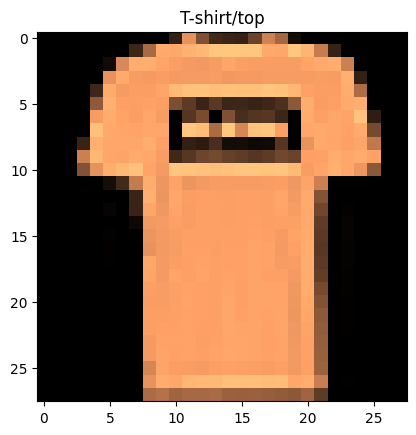

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[1]
class_names = train_data.classes
print(f"The shape of the image is {image.shape}")
plt.imshow(image.squeeze(),cmap='copper')
plt.title(class_names[label])

26440
11512
27395
25799
9175
55471
25872
32938
47358
48980
15394
50453
5378
5858
50574
23074


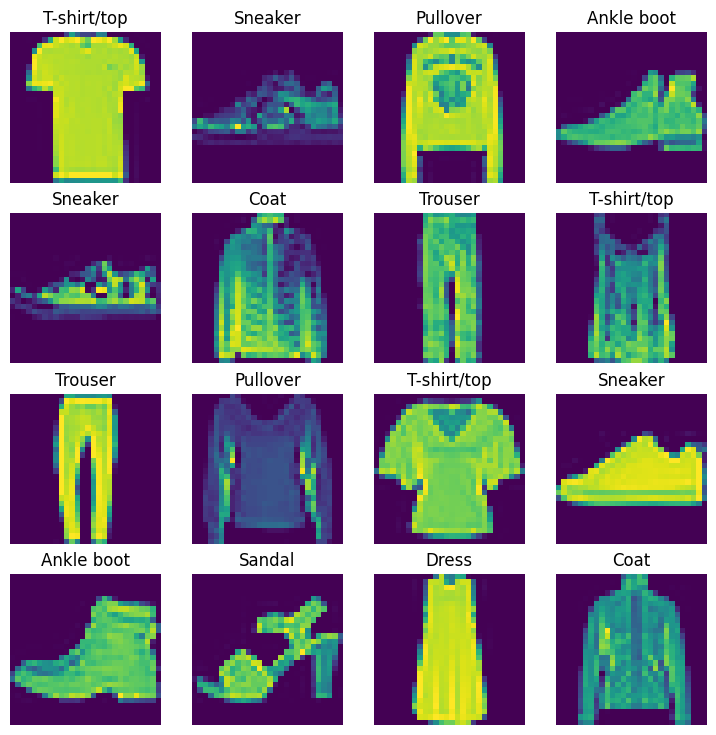

In [ ]:
# Using torch.rand to try and visualize some of the images in our datasets
torch.manual_seed(100)
fig = plt.figure(figsize=(9,9))
rows,cols =4,4
for i in range(1,17):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  print(random_idx)
  image,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze())
  plt.title(class_names[label])
  plt.axis('off')

In [ ]:
# From above we can see the random images

In [15]:
# Load our datasets into a dataloader so that we can use batches if we wish to
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test,batch_size=32,shuffle=False)

In [20]:
class  Vision1(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
      super().__init__()
      self.input_dim = input_dim
      self.hidden_dim = hidden_dim
      self.output_dim = output_dim
      self.flatten = nn.Flatten()
      self.linear1 =nn.Linear(input_dim,hidden_dim)
      self.linear2 =nn.Linear(hidden_dim,output_dim)
    def forward(self,x):
      x = self.flatten(x)
      x = self.linear1(x)
      x = self.linear2(x)
      return x


In [25]:
model = Vision1(input_dim=784,hidden_dim=10,output_dim=10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
batch_size =32

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch{epoch}\n")
  train_loss = 0
  for batch,(X,y) in enumerate(train_loader):
    model.train()
    preds = model(X)
    loss = criterion(preds,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f'Looked at {batch_size*len(X)}/{len(train_loader.dataset)}samples')
      train_loss/=len(train_loader)
      with torch.inference_mode():
        test_loss = 0
        model.eval()
        for X,y in test_loader:
          test_pred = model(X)
          test_loss+=criterion(test_pred,y)
          test_loss/=len(test_loader)
          print(f"Train loss{train_loss}|Test Loss:{test_loss}|")



  0%|          | 0/5 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Train loss0.09072524309158325|Test Loss:0.0013635216746479273|
Train loss0.09072524309158325|Test Loss:0.0025965825188905|
Train loss0.09072524309158325|Test Loss:0.0012278507929295301|
Train loss0.09072524309158325|Test Loss:0.001204867847263813|
Train loss0.09072524309158325|Test Loss:0.0008656610152684152|
Train loss0.09072524309158325|Test Loss:0.0012850711354985833|
Train loss0.09072524309158325|Test Loss:0.0014136101817712188|
Train loss0.09072524309158325|Test Loss:0.0017732594860717654|
Train loss0.09072524309158325|Test Loss:0.0011155122192576528|
Train loss0.09072524309158325|Test Loss:0.001811220427043736|
Train loss0.09072524309158325|Test Loss:0.002101453021168709|
Train loss0.09072524309158325|Test Loss:0.0012255896581336856|
Train loss0.09072524309158325|Test Loss:0.0014818772906437516|
Train loss0.09072524309158325|Test Loss:0.0012770772445946932|
Train loss0.09072524309158325|Test Loss:0.0020691801328212023|
Train loss